# **Computational and Numerical Methods Lab - 4**

```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

# Secant Method

-> Secant method is a root-finding algorithm that uses a succession of roots of secant lines to better approximate a root of a function f(x).

-> Algorithm for secant method:
1. General formula:  $x_{n+1}$=$x_{n}$-$f(x_{n})*((x_{n}-x_{n-1})/f(x_{n})-f(x_{n-1}))$
2. We start with two initial point $x_{0}$ and $x_{1}$.
3. Using the formula, keep on calculating subsequent $x_{n}$ till we get the desired accuracy.

-> Comparision between secant and newtan raphson method:
1. Newton methods converges more rapidly compared to secant method as a result requires less iterations.
2. However secant method requires less time per iterations compared to newton's method because we only have to calculate $f(x_{n})$ whereas in newton method we also need to find $f^{'}(x_{n})$.

In [1]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
err = 1e-7

# Q1)
 **$$f(x)=x^{6}-x-1$$**

In [3]:
def fun(x):
    return x**6 - x - 1

def secant_method(x0, x1, err):
    data = []
    roots = [x0, x1]
    error = []
    fprev = fun(x0)
    fpresent = fun(x1)
    next = x1 - (fpresent * (x1 - x0) / (fpresent - fprev))
    
    i = 2  
    while abs(next - x1) > err:
        prev = x1
        x0 = x1
        x1 = next
        fprev = fpresent
        fpresent = fun(x1)
        next = x1 - (fpresent * (x1 - x0) / (fpresent - fprev))
        data.append([i, x1, fpresent, next, x1 - prev])
        roots.append(x1)
        error.append(abs(x1 - prev))
        i += 1
    
    alpha = next
    data.append([i, next, fun(next), next - (fun(next)*(next - x1) / (fun(next) - fpresent)), next - x1])
    error.append(next - x1)
    
    for j in range(len(data)):
        data[j].append(alpha - roots[j+1])
    
    df = pd.DataFrame(data, columns=['iter', 'x\u2099', 'f(x\u2099)', 'x\u2099\u208a\u2081', 'x\u2099 - x\u2099\u208b\u2081', 'a - x\u2099\u208b\u2081'])
    
    iter = np.arange(1, len(error) + 1, 1)
    
    plt.figure(1)
    plt.plot(iter, error, label='root = ' + str(roots[-1]))
    plt.legend()
    plt.xlabel('Iteration No.')
    plt.ylabel('Error')
    plt.title('Error vs Iteration Graph')
    plt.grid(True)
    plt.plot()
    
    plt.figure(2)
    r = [roots[-1]] * len(iter)
    plt.plot(iter, roots[1:], label='$x_n$')
    plt.plot(iter, r, label='root')
    plt.legend()
    plt.xlabel('Iteration No.')
    plt.ylabel('$x_n$')
    plt.title('Convergence of x towards the root')
    plt.grid(True)
    plt.plot()

    return df


,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.016129,-9.153677e-01,1.190578,1.612903e-02,1.347241e-01
1,3,1.190578,6.574657e-01,1.117656,1.744487e-01,1.185951e-01
2,4,1.117656,-1.684912e-01,1.132532,-7.292194e-02,-5.585363e-02
3,5,1.132532,-2.243729e-02,1.134817,1.487572e-02,1.706831e-02
4,6,1.134817,9.535641e-04,1.134724,2.285258e-03,2.192588e-03
5,7,1.134724,-5.066166e-06,1.134724,-9.316206e-05,-9.266960e-05
6,8,1.134724,-1.134763e-09,1.134724,4.923425e-07,4.924528e-07
7,9,1.134724,1.554312e-15,1.134724,1.103038e-10,1.103038e-10


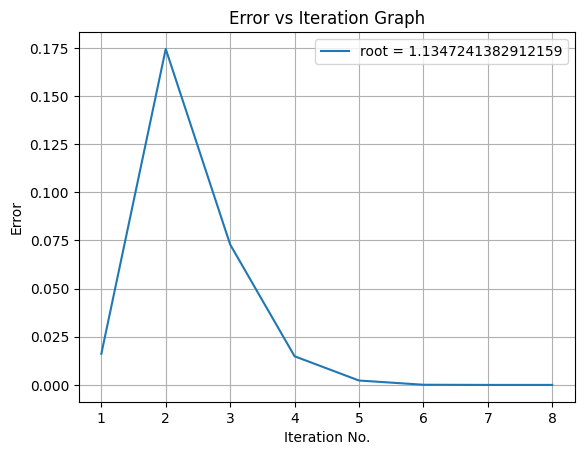

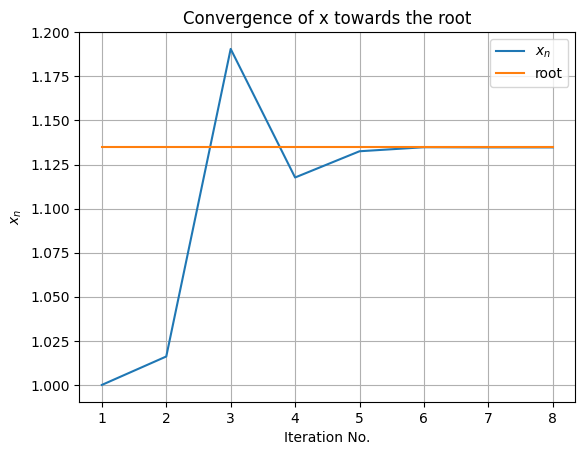

In [4]:
df = secant_method(2,1,err)
df

Result:
1. The root for initial points 1 and 2 is 1.13472413829 
2. The root genrated using secant method is approximately same as that generated using newton method.
3. Convergence towards the root is not monotonic.


# Q2)

**$$f(x) = x^{3}-x^{2}-x-1$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.000000,-2.000000e+00,1.666667,-1.000000e+00,-1.607132e-01
1,3,1.666667,-8.148148e-01,2.125000,6.666667e-01,8.392868e-01
2,4,2.125000,1.955078e+00,1.801494,4.583333e-01,1.726201e-01
3,5,1.801494,-2.003418e-01,1.831563,-3.235062e-01,-2.857132e-01
4,6,1.831563,-4.198234e-02,1.839535,3.006923e-02,3.779293e-02
5,7,1.839535,1.356295e-03,1.839285,7.971590e-03,7.723705e-03
6,8,1.839285,-8.689073e-06,1.839287,-2.494731e-04,-2.478847e-04
7,9,1.839287,-1.778592e-09,1.839287,1.588070e-06,1.588395e-06
8,10,1.839287,2.886580e-15,1.839287,3.251335e-10,3.251335e-10


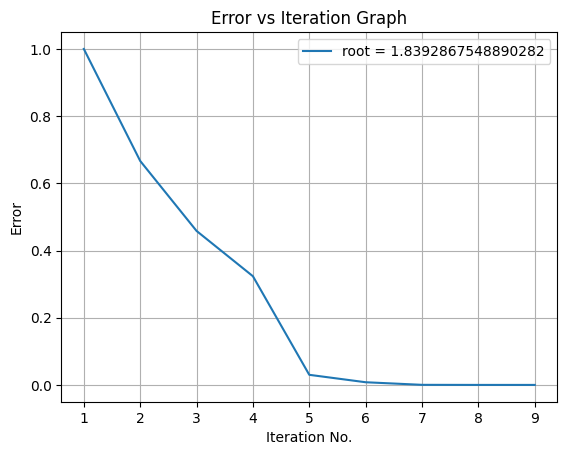

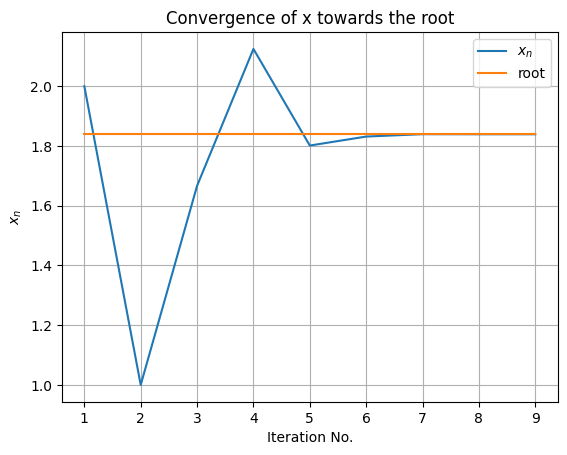

In [5]:
def fun(x):
    return x**3 - x**2 - x - 1
#initial points on different side of root
df = secant_method(0,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,2.650000,7.937125e+00,2.433272,-2.350000e+00,-3.160713e+00
1,3,2.433272,5.052862e+00,2.053592,-2.167281e-01,-8.107132e-01
2,4,2.053592,1.389658e+00,1.909558,-3.796800e-01,-5.939851e-01
3,5,1.909558,4.070655e-01,1.849888,-1.440338e-01,-2.143051e-01
4,6,1.849888,5.850241e-02,1.839873,-5.966992e-02,-7.027133e-02
5,7,1.839873,3.209813e-03,1.839292,-1.001493e-02,-1.060141e-02
6,8,1.839292,2.790118e-05,1.839287,-5.813806e-04,-5.864811e-04
7,9,1.839287,1.350942e-08,1.839287,-5.097943e-06,-5.100413e-06
8,10,1.839287,5.728751e-14,1.839287,-2.469560e-09,-2.469560e-09


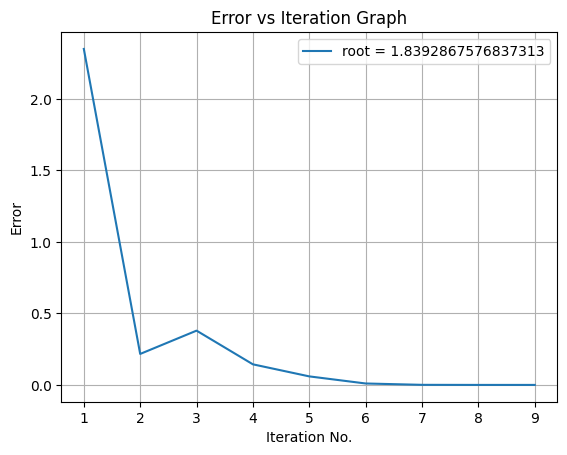

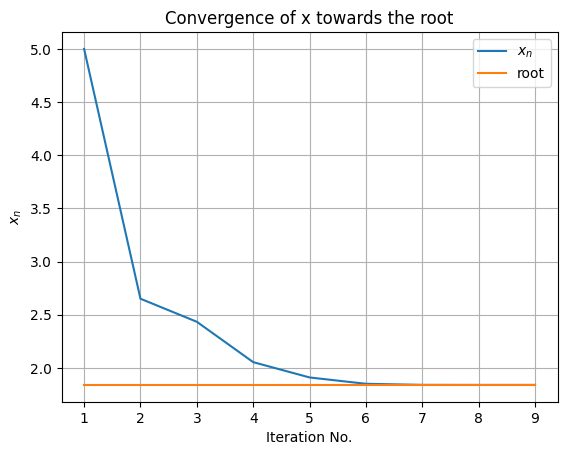

In [6]:
# initial points on same side of root
def fun(x):
    return x**3 - x**2 - x - 1
df = secant_method(3,5,err)
df

Result:
1. The root for initial points 0 and 2 is 1.839286754 (intitial point on different side of root case)
2. The root for initial points 3 and 5 is 1.839286757 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$f(x) = 1 + 0.3*cos(x) -x $$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.072234,7.121513e-02,1.127474,-9.277661e-01,-8.715749e-01
1,3,1.127474,1.208301e-03,1.128428,5.524057e-02,5.619119e-02
2,4,1.128428,-3.577744e-06,1.128425,9.534392e-04,9.506246e-04
3,5,1.128425,1.719340e-10,1.128425,-2.814770e-06,-2.814634e-06
4,6,1.128425,0.000000e+00,1.128425,1.352616e-10,1.352616e-10


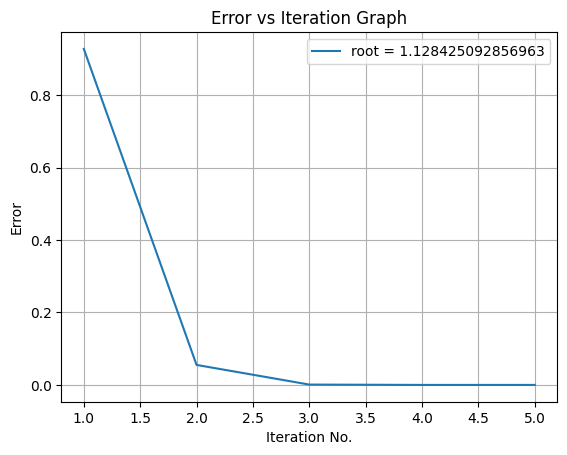

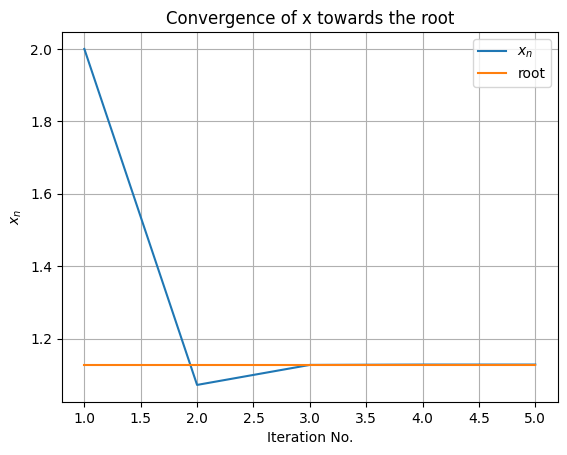

In [7]:
def fun(x):
    return 1 + 0.3*np.cos(x) - x

#initial points on different side of root
df = secant_method(0,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,0.160526,1.135617e+00,1.248689,-4.839474e+00,-3.871575e+00
1,3,1.248689,-1.537196e-01,1.118954,1.088164e+00,9.678993e-01
2,4,1.118954,1.203261e-02,1.128372,-1.297350e-01,-1.202643e-01
3,5,1.128372,6.701453e-05,1.128425,9.417976e-03,9.470697e-03
4,6,1.128425,-3.229184e-08,1.128425,5.274633e-05,5.272092e-05
5,7,1.128425,8.615331e-14,1.128425,-2.540428e-08,-2.540428e-08


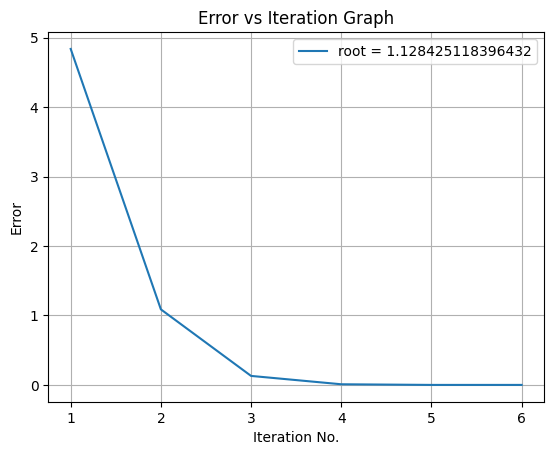

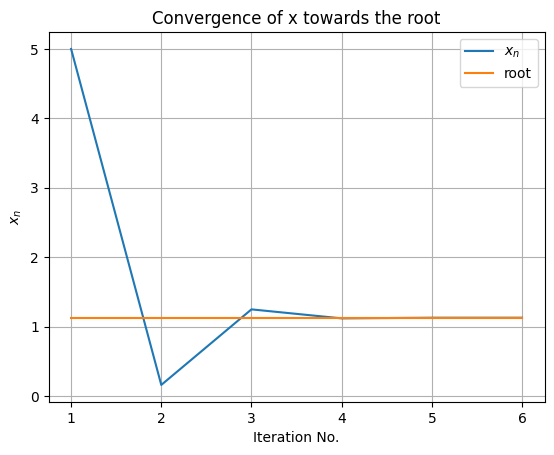

In [8]:
#initial points on same side of root
def fun(x):
    return 1 + 0.3*np.cos(x) - x

df = secant_method(3,5,err)
df

Result:
1. The root for initial points 0 and 2 is 1.12842509 (intitial point on different side of root case)
2. The root for initial points 3 and 5 is 1.12842511 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$f(x)= sin(x) + 1/2 - cos(x)$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,-0.022864,-5.226006e-01,0.427362,-2.022864e+00,-1.575969e+00
1,3,0.427362,4.408743e-03,0.423595,4.502256e-01,4.468950e-01
2,4,0.423595,-5.764560e-04,0.424031,-3.766402e-03,-3.330606e-03
3,5,0.424031,-3.617419e-07,0.424031,4.355222e-04,4.357957e-04
4,6,0.424031,2.980605e-11,0.424031,2.734737e-07,2.734512e-07
5,7,0.424031,0.000000e+00,0.424031,-2.253125e-11,-2.253125e-11


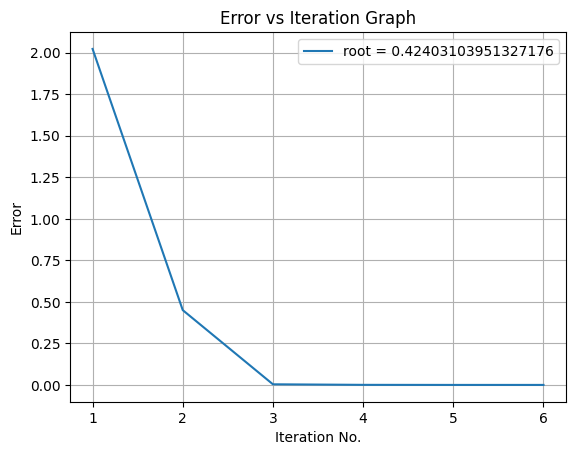

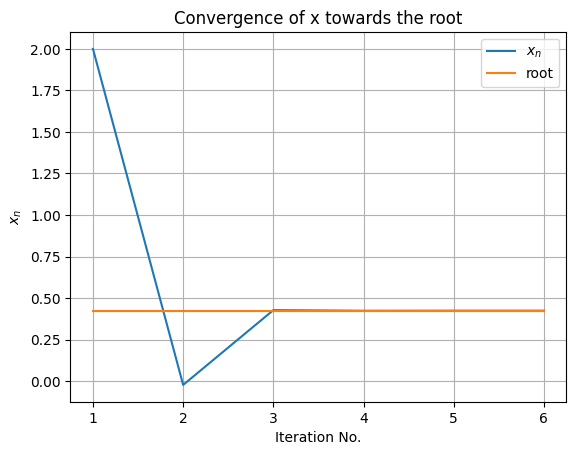

In [9]:
#intitial point on different side of root
def fun(x):
    return 0.5 + np.sin(x) - np.cos(x)
df= secant_method(-1,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.309678,1.207940e+00,0.383408,1.309678e+00,4.240310e-01
1,3,0.383408,-5.331130e-02,0.422561,-9.262693e-01,-8.856468e-01
2,4,0.422561,-1.944706e-03,0.424043,3.915207e-02,4.062254e-02
3,5,0.424043,1.561442e-05,0.424031,1.482272e-03,1.470469e-03
4,6,0.424031,-4.345902e-09,0.424031,-1.180665e-05,-1.180337e-05
5,7,0.424031,-9.658940e-15,0.424031,3.285186e-09,3.285186e-09


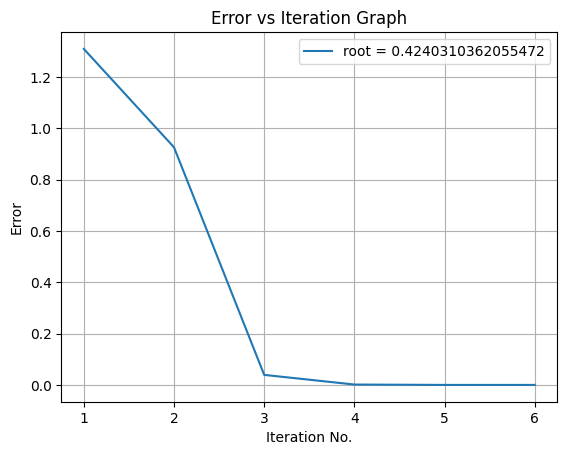

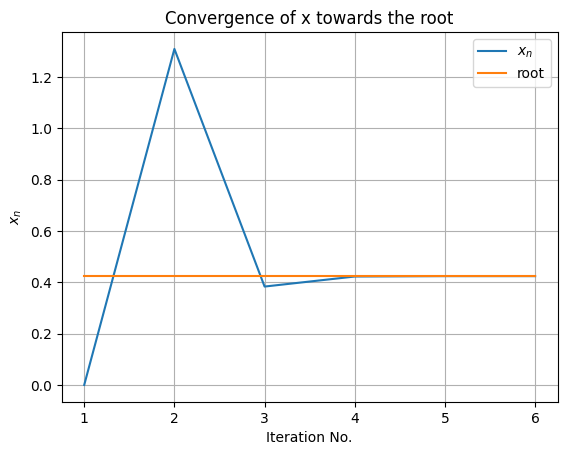

In [10]:
#initial points on same side of root
def fun(x):
    return 0.5 + np.sin(x) - np.cos(x)
df= secant_method(-1,0,err)
df

Result:
1. The root for initial points -1 and 2 is 0.424031039 (intitial point on different side of root case)
2. The root for initial points -1 and 0 is 0.424031036 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$ f(x) = e^{-x} - x$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,0.698162,-2.006631e-01,0.541172,-1.301838e+00,-1.432857e+00
1,3,0.541172,4.089298e-02,0.567749,-1.569895e-01,-1.310187e-01
2,4,0.567749,-9.493880e-04,0.567146,2.657673e-02,2.597086e-02
3,5,0.567146,-4.479254e-06,0.567143,-6.030162e-04,-6.058744e-04
4,6,0.567143,4.910236e-10,0.567143,-2.858544e-06,-2.858230e-06
5,7,0.567143,-3.330669e-16,0.567143,3.133241e-10,3.133241e-10


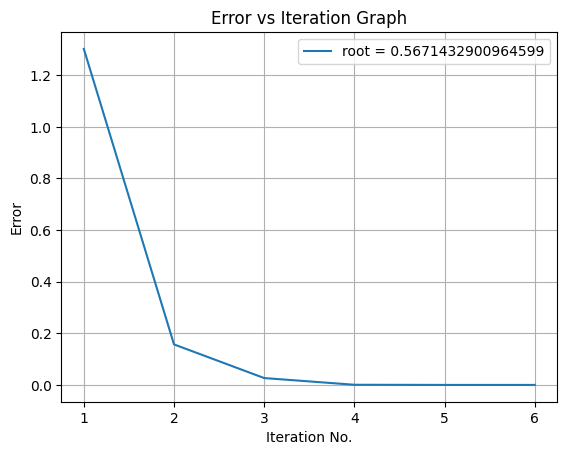

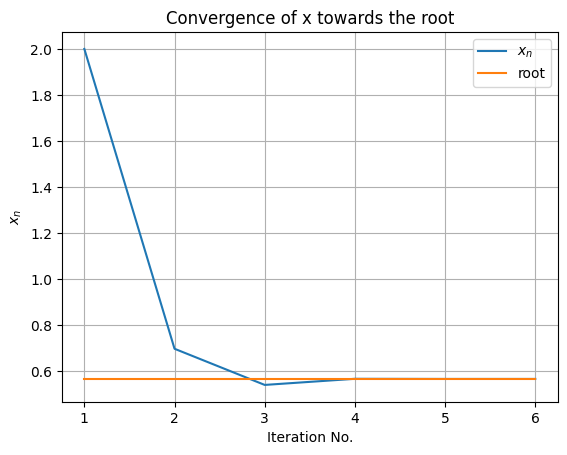

In [11]:
#intital points on different side of root
def fun(x):
    return np.exp(-x) - x

df = secant_method(0,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,0.454620,1.800690e-01,0.601043,-2.545380e+00,-2.432857e+00
1,3,0.601043,-5.280297e-02,0.567842,1.464226e-01,1.125232e-01
2,4,0.567842,-1.094554e-03,0.567139,-3.320085e-02,-3.389938e-02
3,5,0.567139,6.679438e-06,0.567143,-7.027893e-04,-6.985272e-04
4,6,0.567143,-8.441722e-10,0.567143,4.262710e-06,4.262171e-06
5,7,0.567143,-6.661338e-16,0.567143,-5.386690e-10,-5.386690e-10


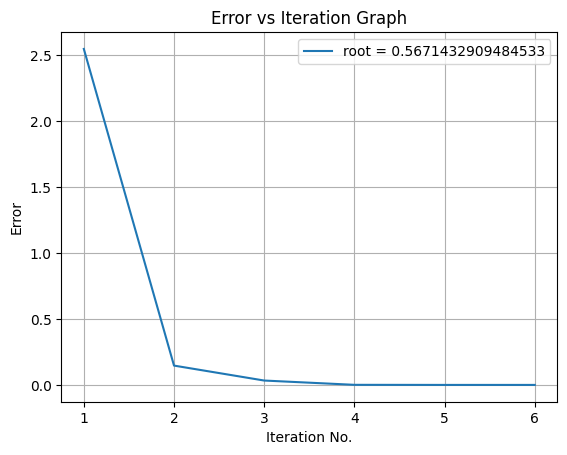

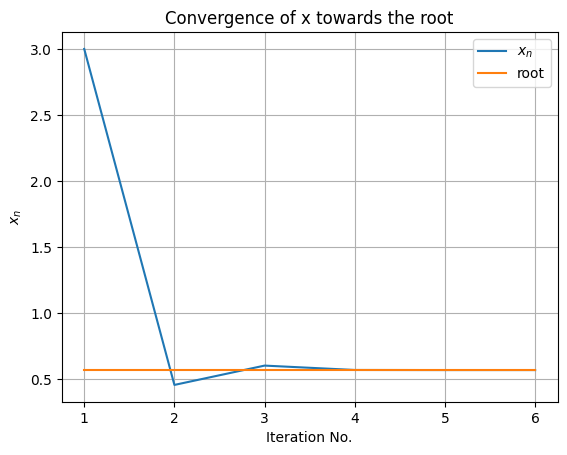

In [12]:
#intital points on same side of root
def fun(x):
    return np.exp(-x) - x

df = secant_method(1,3,err)
df

Result:
1. The root for initial points 0 and 2 is 0.5671432900 (intitial point on different side of root case)
2. The root for initial points 1 and 3 is 0.5671432909 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$ f(x) = e^{-x} - sin(x)$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.127420,-5.794405e-01,-1.471819,-8.725802e-01,-1.411467e+00
1,3,-1.471819,5.352260e+00,0.873512,-2.599239e+00,-5.388870e-01
2,4,0.873512,-3.491062e-01,0.729903,2.345331e+00,2.060352e+00
3,5,0.729903,-1.848413e-01,0.568304,-1.436094e-01,-2.849794e-01
4,6,0.568304,2.828146e-02,0.589749,-1.615984e-01,-1.413700e-01
5,7,0.589749,-1.685340e-03,0.588542,2.144416e-02,2.022838e-02
6,8,0.588542,-1.352833e-05,0.588533,-1.206024e-03,-1.215779e-03
7,9,0.588533,6.587445e-09,0.588533,-9.759173e-06,-9.754423e-06
8,10,0.588533,-2.564615e-14,0.588533,4.749789e-09,4.749789e-09


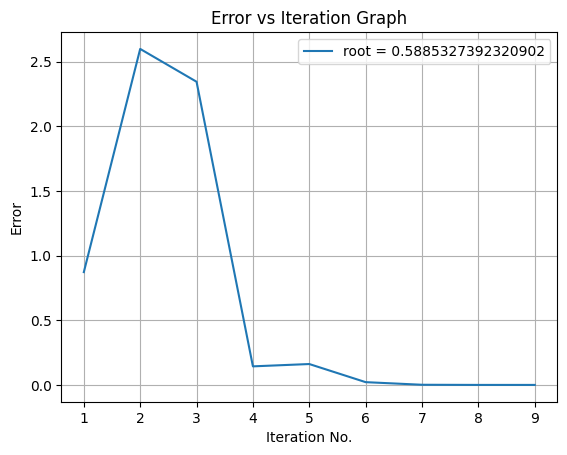

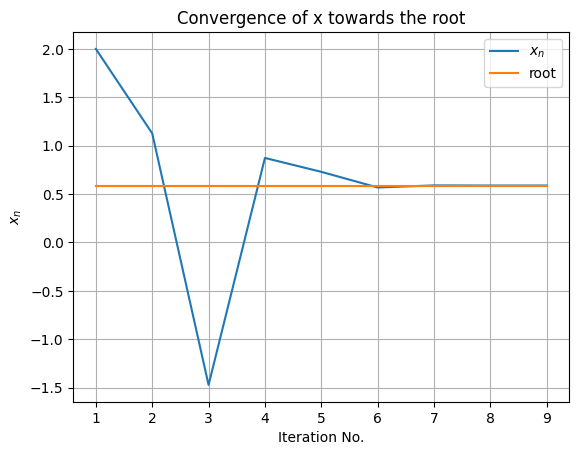

In [13]:
#intital points on different side of the root
def fun(x):
    return np.exp(-x) - np.sin(x)

df = secant_method(0,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,-0.576691,2.325391e+00,1.356556,-2.576691e+00,-1.411467e+00
1,3,1.356556,-7.195918e-01,0.899690,1.933246e+00,1.165223e+00
2,4,0.899690,-3.764383e-01,0.398509,-4.568658e-01,-7.680229e-01
3,5,0.398509,2.832749e-01,0.613712,-5.011804e-01,-3.111571e-01
4,6,0.613712,-3.456808e-02,0.590307,2.152023e-01,1.900233e-01
5,7,0.590307,-2.458614e-03,0.588515,-2.340505e-02,-2.517905e-02
6,8,0.588515,2.512420e-05,0.588533,-1.792119e-03,-1.774004e-03
7,9,0.588533,-1.785548e-08,0.588533,1.812815e-05,1.811527e-05
8,10,0.588533,-1.294520e-13,0.588533,-1.287431e-08,-1.287431e-08


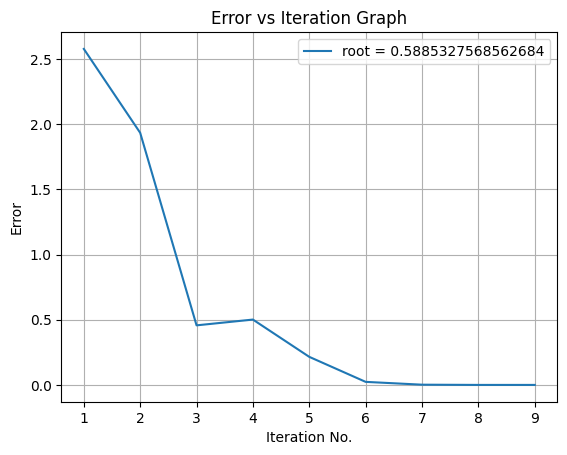

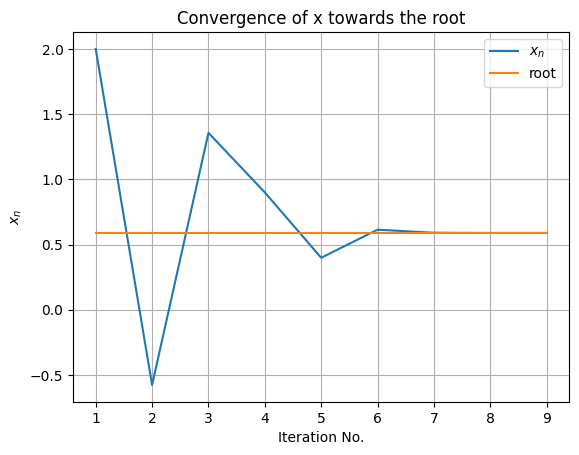

In [14]:
#intital points on same side of the root
def fun(x):
    return np.exp(-x) - np.sin(x)
df = secant_method(1,2,err)
df

Result:
1. The root for initial points 0 and 2 is 0.588532739 (intitial point on different side of root case)
2. The root for initial points 1 and 2 is 0.588532756 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$ f(x) = x^3 - 2x - 2$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.000000,-3.000000e+00,1.600000,-1.000000e+00,-2.307076e-01
1,3,1.600000,-1.104000e+00,1.949367,6.000000e-01,7.692924e-01
2,4,1.949367,1.508923e+00,1.747613,3.493671e-01,1.692924e-01
3,5,1.747613,-1.577521e-01,1.766709,-2.017542e-01,-1.800747e-01
4,6,1.766709,-1.905774e-02,1.769333,1.909619e-02,2.167942e-02
5,7,1.769333,3.011318e-04,1.769292,2.623971e-03,2.583231e-03
6,8,1.769292,-5.593697e-07,1.769292,-4.081650e-05,-4.074082e-05
7,9,1.769292,-1.636558e-11,1.769292,7.567843e-08,7.567843e-08


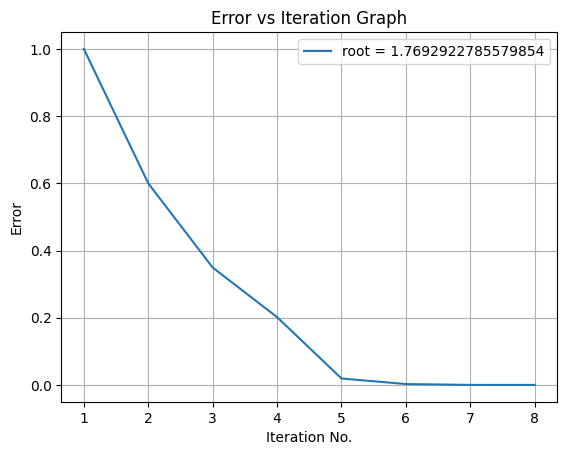

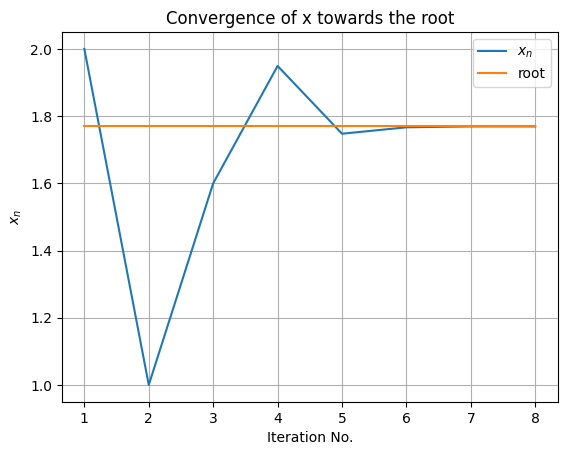

In [15]:
#intitial points on different side of the root
def fun(x):
    return x**3 - 2*x - 2

df = secant_method(0,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.923077,1.265817e+00,1.873223,-2.076923e+00,-2.230708e+00
1,3,1.873223,8.266270e-01,1.779390,-4.985390e-02,-1.537846e-01
2,4,1.779390,7.517485e-02,1.770003,-9.383315e-02,-1.039307e-01
3,5,1.770003,5.254131e-03,1.769297,-9.387015e-03,-1.009752e-02
4,6,1.769297,3.786356e-05,1.769292,-7.053790e-04,-7.105018e-04
5,7,1.769292,1.931199e-08,1.769292,-5.120167e-06,-5.122780e-06
6,8,1.769292,7.061018e-14,1.769292,-2.612831e-09,-2.612831e-09


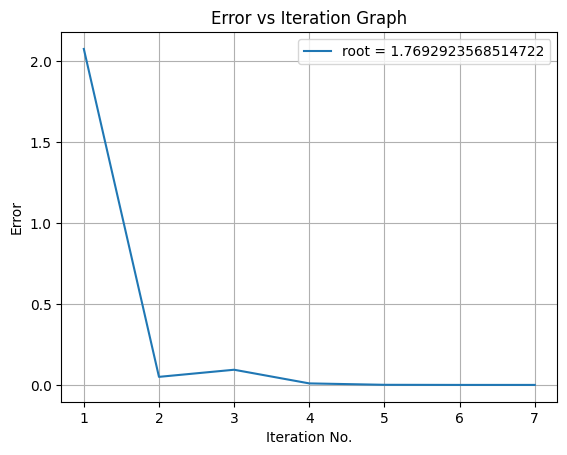

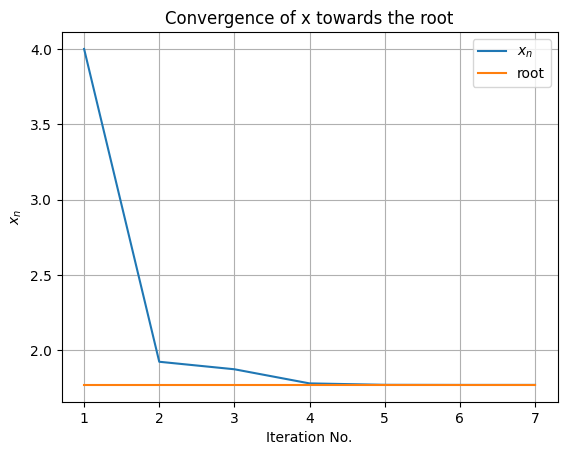

In [16]:
#intitial points on same side of the root
def fun(x):
    return x**3 - 2*x - 2

df = secant_method(2,4,err)
df

Result:
1. The root for initial points 0 and 2 is 1.76929227 (intitial point on different side of root case)
2. The root for initial points 2 and 4 is 1.76929235 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$ f(x) = x^4 - x - 1$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.071429,-7.536183e-01,1.122309,-9.285714e-01,-7.792559e-01
1,3,1.122309,-5.357741e-01,1.247446,5.088031e-02,1.493155e-01
2,4,1.247446,1.740669e-01,1.216760,1.251369e-01,9.843520e-02
3,5,1.216760,-2.486657e-02,1.220596,-3.068602e-02,-2.670172e-02
4,6,1.220596,-9.322831e-04,1.220745,3.835736e-03,3.984298e-03
5,7,1.220745,5.311782e-06,1.220744,1.494087e-04,1.485624e-04
6,8,1.220744,-1.124280e-09,1.220744,-8.464492e-07,-8.462701e-07
7,9,1.220744,-6.661338e-16,1.220744,1.791198e-10,1.791198e-10


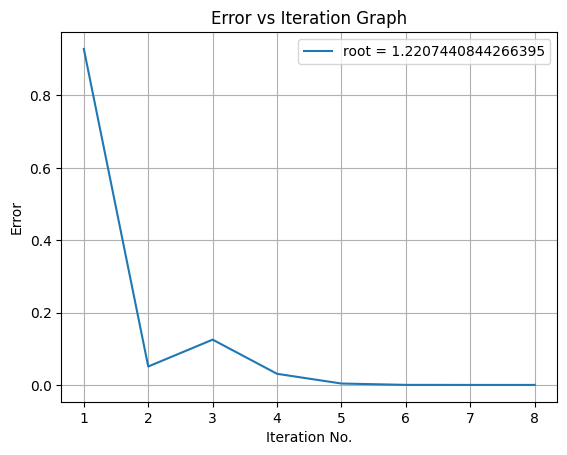

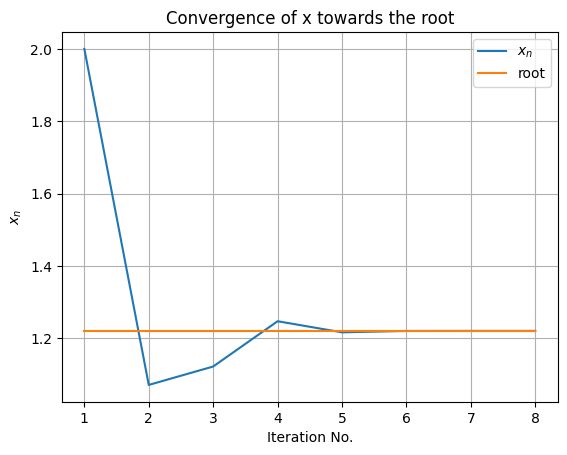

In [17]:
#intital points on differnet side of the root
def fun(x):
    return x**4 - x - 1

df = secant_method(1,2,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,1.890756,9.889578e+00,1.804242,-2.109244e+00,-2.779256e+00
1,3,1.804242,7.792663e+00,1.482733,-8.651443e-02,-6.700122e-01
2,4,1.482733,2.350652e+00,1.343858,-3.215093e-01,-5.834978e-01
3,5,1.343858,9.176141e-01,1.254933,-1.388745e-01,-2.619885e-01
4,6,1.254933,2.252405e-01,1.226004,-8.892521e-02,-1.231140e-01
5,7,1.226004,3.326353e-02,1.220992,-2.892883e-02,-3.418884e-02
6,8,1.220992,1.554387e-03,1.220746,-5.012451e-03,-5.260008e-03
7,9,1.220746,1.158685e-05,1.220744,-2.457110e-04,-2.475570e-04
8,10,1.220744,4.085207e-09,1.220744,-1.845356e-06,-1.846007e-06
9,11,1.220744,1.043610e-14,1.220744,-6.508520e-10,-6.508520e-10


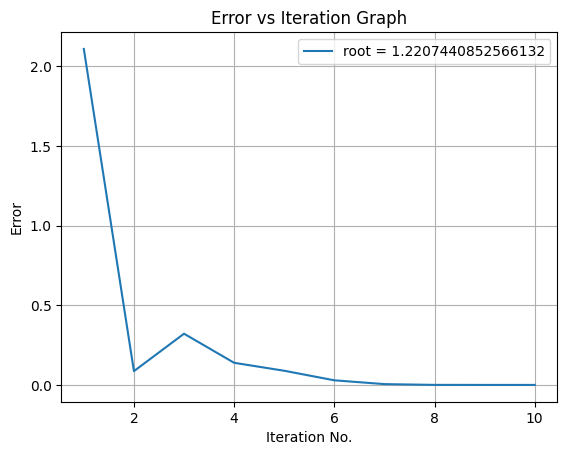

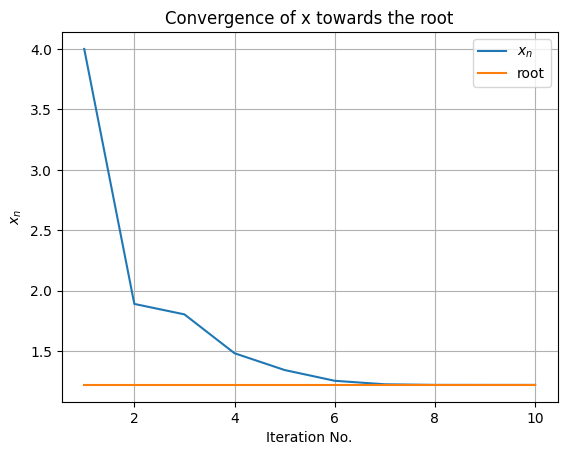

In [18]:
#intital points on same side of the root
def fun(x):
    return x**4 - x - 1

df = secant_method(2,4,err)
df

Result:
1. The root for initial points 1 and 2 is 1.220744084 (intitial point on different side of root case)
2. The root for initial points 2 and 4 is 1.220744085 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.

**$$ f(x) = tan(x) - x$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,4.396304,-1.338664e+00,4.445007,-2.036955e-01,-1.065905e-01
1,3,4.445007,-7.945891e-01,4.516135,4.870293e-02,9.710500e-02
2,4,4.516135,5.137204e-01,4.488206,7.112777e-02,4.840207e-02
3,5,4.488206,-1.025405e-01,4.492853,-2.792901e-02,-2.272570e-02
4,6,4.492853,-1.120000e-02,4.493423,4.647146e-03,5.203311e-03
5,7,4.493423,2.758069e-04,4.493409,5.698241e-04,5.561649e-04
6,8,4.493409,-7.234117e-07,4.493409,-1.369503e-05,-1.365920e-05
7,9,4.493409,-4.660716e-11,4.493409,3.582660e-08,3.582660e-08


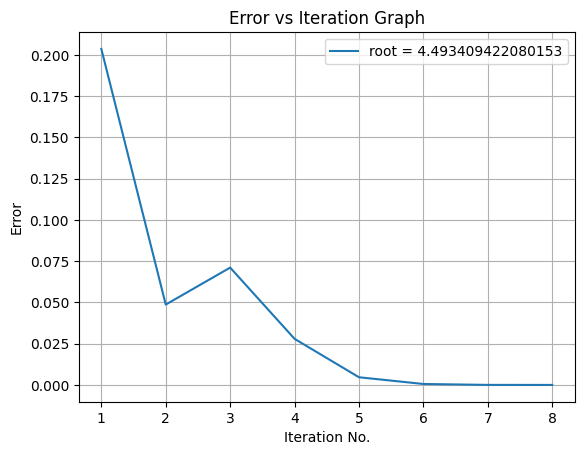

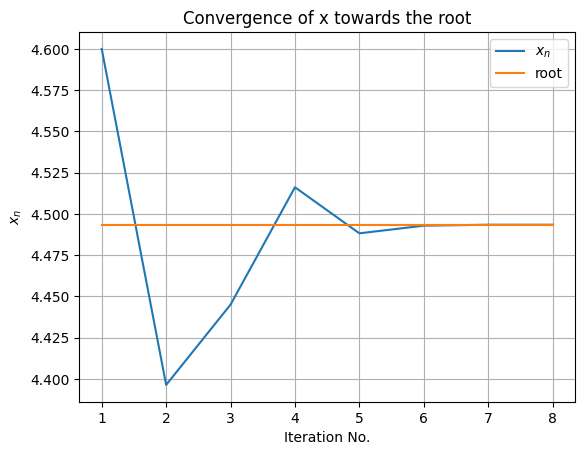

In [19]:
#intitial point on different side of the root
def fun(x):
    return np.tan(x) - x

df = secant_method(4.3,4.6,err)
df

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,2,4.508061,3.177417e-01,4.526032,-4.919386e-01,-5.065905e-01
1,3,4.526032,7.777395e-01,4.495649,1.797020e-02,-1.465197e-02
2,4,4.495649,4.569199e-02,4.493752,-3.038304e-02,-3.262217e-02
3,5,4.493752,6.930982e-03,4.493413,-1.896409e-03,-2.239130e-03
4,6,4.493413,7.304370e-05,4.493409,-3.391031e-04,-3.427207e-04
5,7,4.493409,1.180493e-07,4.493409,-3.611777e-06,-3.617623e-06
6,8,4.493409,2.009060e-12,4.493409,-5.846607e-09,-5.846607e-09


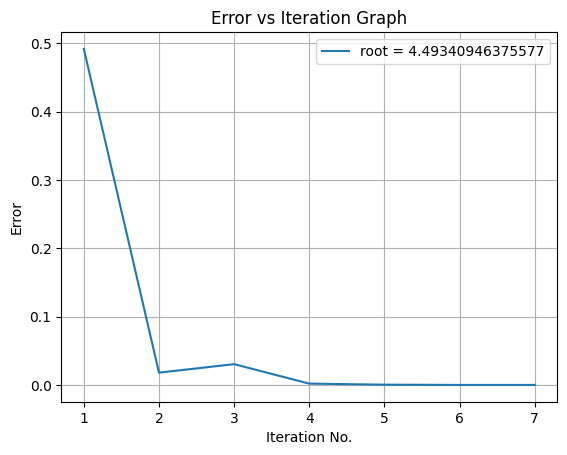

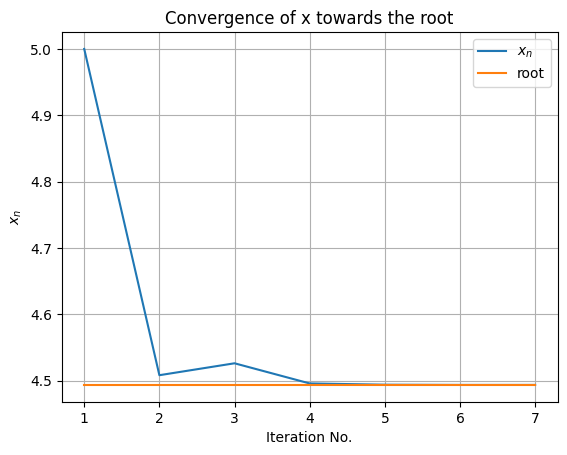

In [20]:
#intitial point on same side of the root
def fun(x):
    return np.tan(x) - x

df = secant_method(4.5,5,err)
df

Result:
1. The root for initial points 4.3 and 4.6 is 4.49340942  (intitial point on different side of root case)
2. The root for initial points 4.5 and 5 is 4.49340946 (initial point on same side of root case)
3. The root genrated using secant method is approximately same as that generated using newton method.
4. Convergence towards the root is not monotonic.